✅ Dataset loaded successfully!
(1941, 35)
🔹 Training samples: (1552, 27)
🔹 Testing samples: (389, 27)
✅ Model trained successfully!

📄 Classification Report:
              precision    recall  f1-score   support

      Pastry       0.81      0.45      0.58        29
   Z_Scratch       0.97      0.85      0.91        41
    K_Scatch       0.97      0.94      0.96        83
      Stains       1.00      0.92      0.96        13
   Dirtiness       0.75      0.75      0.75         8
       Bumps       0.67      0.49      0.56        72
Other_Faults       0.79      0.59      0.68       143

   micro avg       0.85      0.68      0.75       389
   macro avg       0.85      0.71      0.77       389
weighted avg       0.83      0.68      0.74       389
 samples avg       0.67      0.68      0.67       389


🎯 Accuracy for Each Defect Label:
🔸 Pastry: 95.12%
🔸 Z_Scratch: 98.20%
🔸 K_Scatch: 98.20%
🔸 Stains: 99.74%
🔸 Dirtiness: 98.97%
🔸 Bumps: 86.12%
🔸 Other_Faults: 79.18%


C:\Users\sriva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


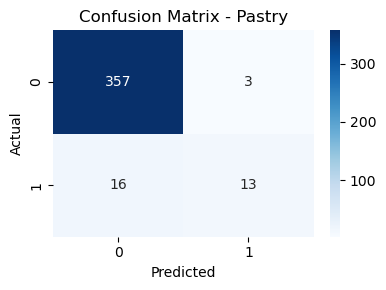

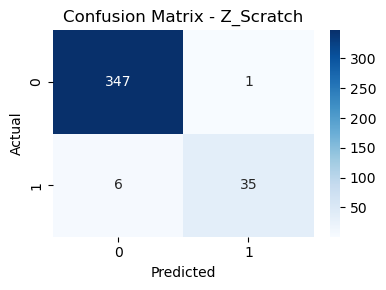

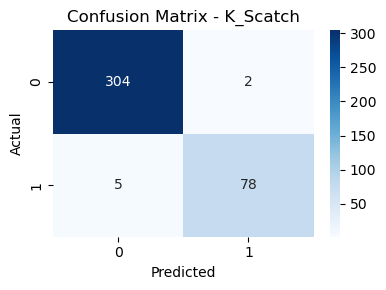

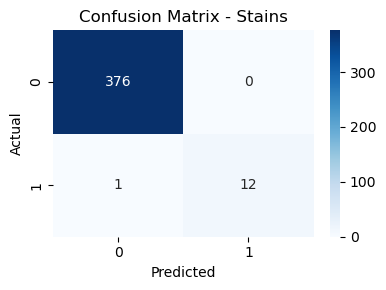

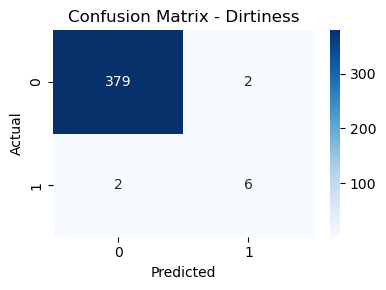

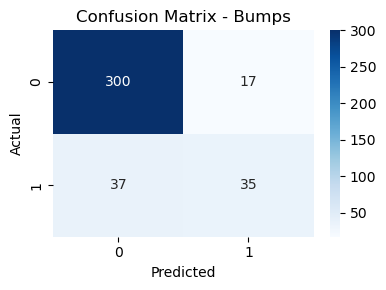

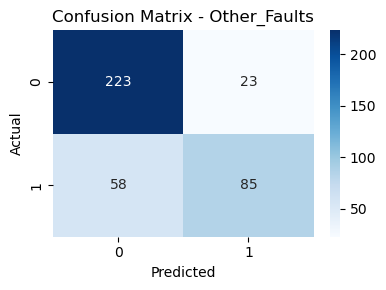

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#  Load the Dataset
df = pd.read_csv("Original.csv")  # make sure this matches your file name
print("✅ Dataset loaded successfully!")
print(df.shape)
df.head()

# Drop Unnecessary Column (id column not useful)
df = df.drop('id', axis=1)

# Separate Features and Labels
label_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
X = df.drop(label_cols, axis=1)   # input features
y = df[label_cols]                # output labels (multi-label)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("🔹 Training samples:", X_train.shape)
print("🔹 Testing samples:", X_test.shape)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and Train the Model
# Using Random Forest inside MultiOutputClassifier for multi-label classification
model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
model.fit(X_train, y_train)
print("✅ Model trained successfully!")

# Predict on Test Set
y_pred = model.predict(X_test)

# Classification Report
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_cols))

# Accuracy for Each Defect Type
print("\n🎯 Accuracy for Each Defect Label:")
for i, col in enumerate(label_cols):
    acc = accuracy_score(y_test[col], y_pred[:, i])
    print(f"🔸 {col}: {acc * 100:.2f}%")

# Confusion Matrix for each class
for i, col in enumerate(label_cols):
    cm = confusion_matrix(y_test[col], y_pred[:, i])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {col}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
